In [1]:
import matplotlib.pyplot as plt

from rutils import AllLightningLogs

In [2]:
logs = AllLightningLogs()

In [3]:
logs.experiments

['dinov3_probing_5_nonorm',
 'dinov3_probing_1_nonorm',
 'dinov3_probing_11_nonorm',
 'dinov3_probing_10_nonorm',
 'dinov3_probing_0',
 'dinov3_probing_1',
 'dinov3_probing_3_nonorm',
 'dinov3_probing_3',
 'baseline',
 'dinov3_probing_6_nonorm',
 'dinov3_probing_4_nonorm',
 'dinov3_probing_6',
 'dinov3_probing_0_nonorm',
 'dinov3_drop_last_layer',
 'dinov3_probing_7_nonorm',
 'dinov3_no_ropesincos',
 'dinov3_probing_9_nonorm',
 'dinov3_probing_8_nonorm',
 'dinov3_drop_last_layer_imagenet',
 'dinov3_probing_9',
 'dinov3_probing_5',
 'dinov3_probing_4',
 'dinov3_probing_11',
 'dinov3_probing_10',
 'dinov3_probing_7',
 'dinov3_baseline',
 'dinov3_probing_2',
 'dinov3_probing_8',
 'dinov3_probing_2_nonorm']

In [4]:
baseline_results = logs['baseline']
dinov3_baseline = logs['dinov3_baseline']

## DINOv2 + SALAD (Baseline) vs DINOv3 + SALAD (mine)

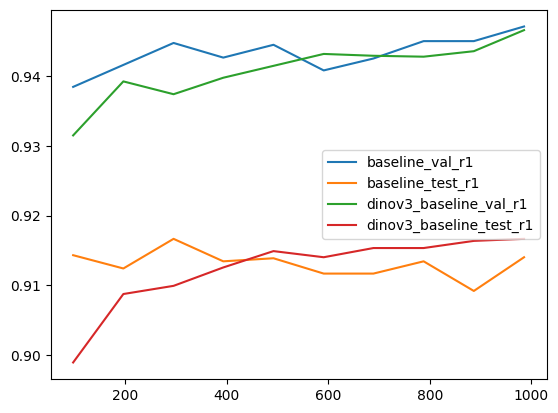

In [5]:
plt.plot(baseline_results.metrics['pitts30k_val/R1'].dropna(), label= 'baseline_val_r1')
plt.plot(baseline_results.metrics['pitts30k_test/R1'].dropna(), label = 'baseline_test_r1')

plt.plot(dinov3_baseline.metrics['pitts30k_val/R1'].dropna(), label= 'dinov3_baseline_val_r1')
plt.plot(dinov3_baseline.metrics['pitts30k_test/R1'].dropna(), label = 'dinov3_baseline_test_r1')


plt.legend()

## ROPE embedding.
### With vs with out

In [6]:
dinov3_no_rope_sincos = logs['dinov3_no_ropesincos']

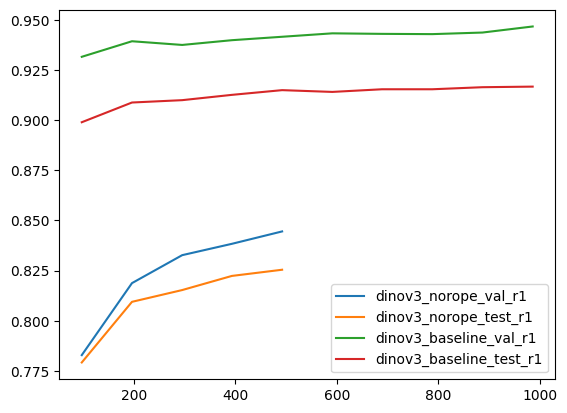

In [7]:
plt.plot(dinov3_no_rope_sincos.metrics['pitts30k_val/R1'].dropna(), label= 'dinov3_norope_val_r1')
plt.plot(dinov3_no_rope_sincos.metrics['pitts30k_test/R1'].dropna(), label = 'dinov3_norope_test_r1')

plt.plot(dinov3_baseline.metrics['pitts30k_val/R1'].dropna(), label= 'dinov3_baseline_val_r1')
plt.plot(dinov3_baseline.metrics['pitts30k_test/R1'].dropna(), label = 'dinov3_baseline_test_r1')


plt.legend()

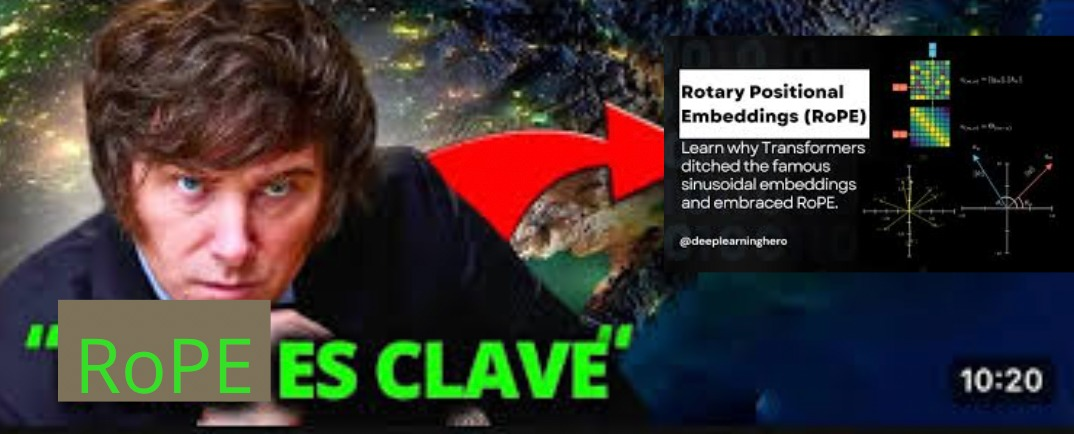

We also employ a custom variant of RoPE: our
base implementation assigns coordinates in a normalized [−1, 1] box to each patch, then applies a bias in
the multi-head attention operation depending on the relative position of two patches. In order to improve
the robustness of the model to resolutions, scales and aspect ratios, we employ RoPE-box jittering.

As a side note, our model can seamlessly process images at varying resolutions without requiring adaptation,
thanks to the adoption of Rotary Positional Embeddings (RoPE) introduced by Su et al. (2024)

## DINOv3 Linear Probing + SALAD

In [8]:
import pandas as pd


def get_last_metrics_value(log):
    metrics_d = {
        metric: value.dropna().iloc[-1]
        for metric, value in log.metrics.items()
    }
    return metrics_d

In [9]:
probing_experiments = {
    experiment
    for experiment in logs.experiments
    if 'probing' in experiment
}

data = {
    experiment: get_last_metrics_value(logs[experiment])
    for experiment in probing_experiments
}

In [10]:
import re

def sort_key(s):
    # Extract number and optional postfix using regex
    match = re.search(r'\_(\d+)_?([a-zA-Z]*)$', s)
    if match:
        number = int(match.group(1))
        postfix = match.group(2)
        return (number, postfix != '', postfix)
    return (float('inf'), True, '')  # fallback in case format is wrong



In [11]:
sorted_keys = sorted(data.keys(), key=sort_key)

# Build DataFrame with sorted keys
df = pd.DataFrame.from_dict(data, orient='index')
df = df.loc[sorted_keys]  # Reorder rows

In [12]:
def mark_extrema(s):
    is_max = s == s.max()
    is_min = s == s.min()
    result = []
    for val, max_flag, min_flag in zip(s, is_max, is_min):
        if max_flag:
            result.append(f"🔺 {val}")
        elif min_flag:
            result.append(f"🔻 {val}")
        else:
            result.append(val)
    return result

# Apply the marker function column-wise
df_marked = df.drop(columns=['epoch', 'step']).apply(mark_extrema)

# Style: highlight background + keep markers
styled = df_marked.style.background_gradient(cmap='RdYlGn', axis=0)

In [13]:
df.drop(columns=['epoch', 'step']).style.background_gradient(cmap='RdYlGn', axis=0)

,b_acc,loss,pitts30k_test/R1,pitts30k_test/R10,pitts30k_test/R5,pitts30k_val/R1,pitts30k_val/R10,pitts30k_val/R5
dinov3_probing_0,0.000217,1.473686,0.249560,0.529636,0.429724,0.223055,0.453470,0.373291
dinov3_probing_0_nonorm,0.000451,1.471179,0.273034,0.574090,0.476819,0.215694,0.461619,0.374737
dinov3_probing_1,0.001180,1.450947,0.468163,0.754401,0.670188,0.455705,0.739748,0.658517
dinov3_probing_1_nonorm,0.003427,1.444039,0.522887,0.793721,0.718603,0.474632,0.750920,0.673370
dinov3_probing_2,0.004559,1.379145,0.599178,0.842723,0.782717,0.616193,0.851078,0.798107
dinov3_probing_2_nonorm,0.015114,1.335809,0.678697,0.878815,0.831866,0.665089,0.882098,0.828864
dinov3_probing_3,0.018243,1.277241,0.750587,0.909184,0.873973,0.773134,0.933491,0.897345
dinov3_probing_3_nonorm,0.051748,1.212590,0.791227,0.921215,0.892752,0.804679,0.946241,0.918638
dinov3_probing_4,0.048925,1.199217,0.811913,0.932805,0.905810,0.826893,0.959122,0.934411
dinov3_probing_4_nonorm,0.103934,0.870102,0.839495,0.937207,0.916520,0.854627,0.966746,0.947818


In [14]:
df_marked

,b_acc,loss,pitts30k_test/R1,pitts30k_test/R10,pitts30k_test/R5,pitts30k_val/R1,pitts30k_val/R10,pitts30k_val/R5
dinov3_probing_0,🔻 0.0002174613473471,🔺 1.4736860990524292,🔻 0.2495598644018173,🔻 0.5296361446380615,🔻 0.4297241866588592,0.223055,🔻 0.4534700214862823,🔻 0.3732912838459015
dinov3_probing_0_nonorm,0.000451,1.471179,0.273034,0.57409,0.476819,🔻 0.2156940102577209,0.461619,0.374737
dinov3_probing_1,0.00118,1.450947,0.468163,0.754401,0.670188,0.455705,0.739748,0.658517
dinov3_probing_1_nonorm,0.003427,1.444039,0.522887,0.793721,0.718603,0.474632,0.75092,0.67337
dinov3_probing_2,0.004559,1.379145,0.599178,0.842723,0.782717,0.616193,0.851078,0.798107
dinov3_probing_2_nonorm,0.015114,1.335809,0.678697,0.878815,0.831866,0.665089,0.882098,0.828864
dinov3_probing_3,0.018243,1.277241,0.750587,0.909184,0.873973,0.773134,0.933491,0.897345
dinov3_probing_3_nonorm,0.051748,1.21259,0.791227,0.921215,0.892752,0.804679,0.946241,0.918638
dinov3_probing_4,0.048925,1.199217,0.811913,0.932805,0.90581,0.826893,0.959122,0.934411
dinov3_probing_4_nonorm,0.103934,0.870102,0.839495,0.937207,0.91652,0.854627,0.966746,0.947818


<Axes: >

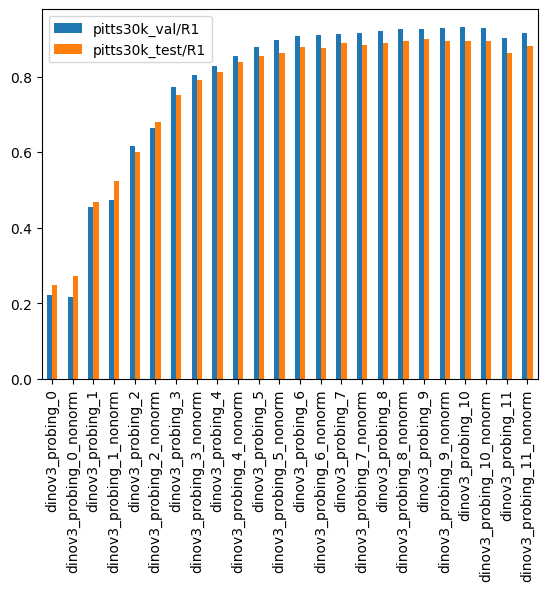

In [15]:
df[['pitts30k_val/R1', 'pitts30k_test/R1']].plot.bar()

<Axes: >

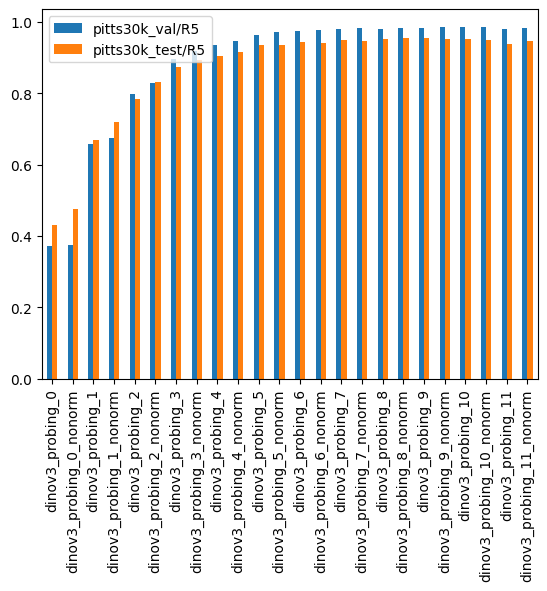

In [16]:
df[['pitts30k_val/R5', 'pitts30k_test/R5']].plot.bar()

- **layers 9 and 10 show best recalls on eval while last layer (11) shows the best training metrics.**
- **In earlier layers, skipping norm layer is better**
- **In general, best results are obtained using the norm layer**
- **However, none of these metrics outperform the baseline**

## Let's drop some layers

In [17]:
print(logs['dinov3_drop_last_layer'].params['backbone_arch'])
print(logs['dinov3_drop_last_layer'].params['backbone_config'])

dinov3_vitb16
{'norm_layer': True, 'num_trainable_blocks': 2, 'probing_from_layer': 10, 'return_token': True, 'rope_sincos': True}


In [18]:
drop_last = logs['dinov3_drop_last_layer']

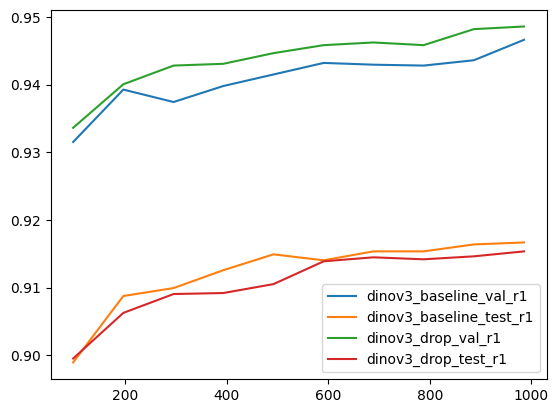

In [19]:
plt.plot(dinov3_baseline.metrics['pitts30k_val/R1'].dropna(), label= 'dinov3_baseline_val_r1')
plt.plot(dinov3_baseline.metrics['pitts30k_test/R1'].dropna(), label = 'dinov3_baseline_test_r1')

plt.plot(drop_last.metrics['pitts30k_val/R1'].dropna(), label= 'dinov3_drop_val_r1')
plt.plot(drop_last.metrics['pitts30k_test/R1'].dropna(), label = 'dinov3_drop_test_r1')
plt.legend()

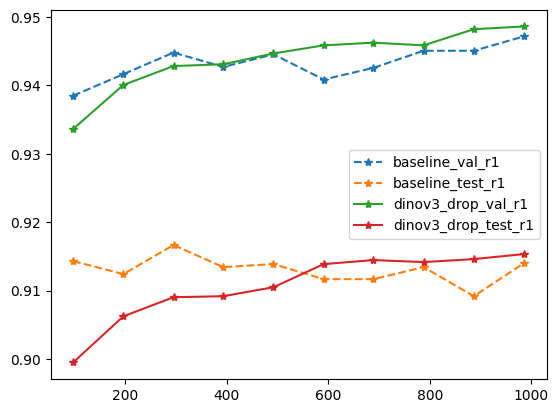

In [20]:
plt.plot(baseline_results.metrics['pitts30k_val/R1'].dropna(), '--*', label= 'baseline_val_r1')
plt.plot(baseline_results.metrics['pitts30k_test/R1'].dropna(), '--*', label = 'baseline_test_r1')

plt.plot(drop_last.metrics['pitts30k_val/R1'].dropna(), '-*', label= 'dinov3_drop_val_r1')
plt.plot(drop_last.metrics['pitts30k_test/R1'].dropna(), '-*', label = 'dinov3_drop_test_r1')
plt.legend()

### It seems that they now recommend using Imagenet mean/std

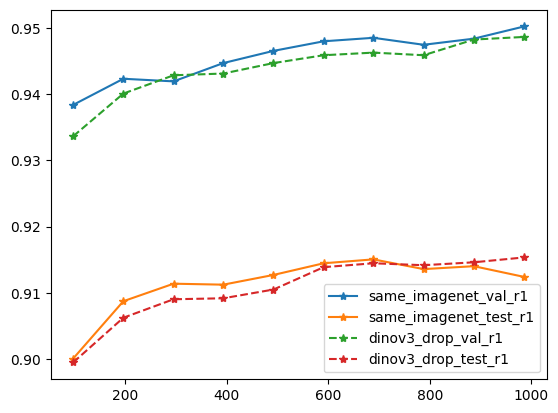

In [23]:
drop_last_imagenet = logs['dinov3_drop_last_layer_imagenet']

plt.plot(drop_last_imagenet.metrics['pitts30k_val/R1'].dropna(), '-*', label= 'same_imagenet_val_r1')
plt.plot(drop_last_imagenet.metrics['pitts30k_test/R1'].dropna(), '-*',label = 'same_imagenet_test_r1')

plt.plot(drop_last.metrics['pitts30k_val/R1'].dropna(), '--*', label= 'dinov3_drop_val_r1')
plt.plot(drop_last.metrics['pitts30k_test/R1'].dropna(), '--*', label = 'dinov3_drop_test_r1')

plt.legend()

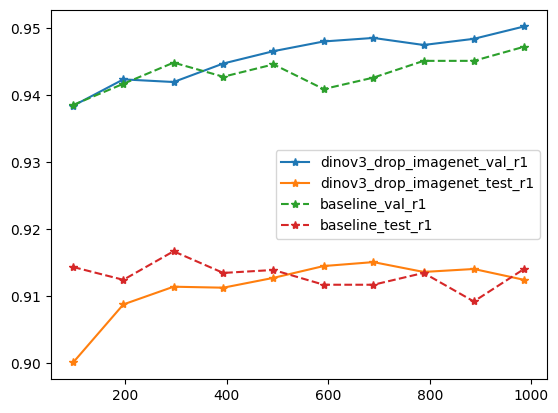

In [25]:
drop_last_imagenet = logs['dinov3_drop_last_layer_imagenet']

plt.plot(drop_last_imagenet.metrics['pitts30k_val/R1'].dropna(), '-*', label= 'dinov3_drop_imagenet_val_r1')
plt.plot(drop_last_imagenet.metrics['pitts30k_test/R1'].dropna(), '-*',label = 'dinov3_drop_imagenet_test_r1')


plt.plot(baseline_results.metrics['pitts30k_val/R1'].dropna(), '--*', label= 'baseline_val_r1')
plt.plot(baseline_results.metrics['pitts30k_test/R1'].dropna(), '--*', label = 'baseline_test_r1')
plt.legend()